Download dataset from kaggle https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 99% 671M/675M [00:10<00:00, 48.7MB/s]
100% 675M/675M [00:10<00:00, 66.0MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/cell-images-for-detecting-malaria.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

#train_path = '/content/Dataset/Train'
#valid_path = '/content/Dataset/Test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vggmodel = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vggmodel.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
#folders = glob('/content/Dataset/Train/*')
folders = glob('/content/cell_images/cell_images/*')
folders

['/content/cell_images/cell_images/Uninfected',
 '/content/cell_images/cell_images/Parasitized']

In [ ]:
x = Flatten()(vggmodel.output)

In [ ]:
#prediction = Dense(len(folders), activation='softmax')(x)
prediction = Dense(1, activation='sigmoid')(x)
# create a model object
model = Model(inputs=vggmodel.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#from tensorflow.keras.layers import MaxPooling2D

In [ ]:
# ### Create Model from scratch using CNN
# model=Sequential()
# model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(500,activation="relu"))
# model.add(Dense(2,activation="softmax"))
# model.summary()

In [ ]:
# tell the model what cost and optimization method to use
# model.compile(
#   loss='categorical_crossentropy',
#   optimizer='adam',
#   metrics=['accuracy']
# )

model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.2,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.2)


In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = datagen.flow_from_directory('/content/cell_images/cell_images',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary',subset='training')

Found 22048 images belonging to 2 classes.


In [ ]:
test_set =datagen.flow_from_directory('/content/cell_images/cell_images',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary',subset='validation')

Found 5510 images belonging to 2 classes.


In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
689/689 [==============================] - 167s 226ms/step - loss: 0.3661 - accuracy: 0.8402 - val_loss: 0.3150 - val_accuracy: 0.8800
Epoch 2/10
689/689 [==============================] - 164s 238ms/step - loss: 0.2524 - accuracy: 0.9005 - val_loss: 0.2795 - val_accuracy: 0.8962
Epoch 3/10
689/689 [==============================] - 167s 242ms/step - loss: 0.2046 - accuracy: 0.9210 - val_loss: 0.2376 - val_accuracy: 0.9067
Epoch 4/10
689/689 [==============================] - 167s 242ms/step - loss: 0.1852 - accuracy: 0.9302 - val_loss: 0.3572 - val_accuracy: 0.8566
Epoch 5/10
689/689 [==============================] - 167s 242ms/step - loss: 0.1728 - accuracy: 0.9356 - val_loss: 0.2802 - val_accuracy: 0.8855
Epoch 6/10
689/689 [==============================] - 167s 242ms/step - loss: 0.1608 - accuracy: 0.9388 - val_loss: 0.2973 - val_accuracy: 0.8802
Epoch 7/10
689/689 [==============================] - 167s 242ms/step - loss: 0.1513 - accuracy: 0.9431 - val_loss: 0.2322 -

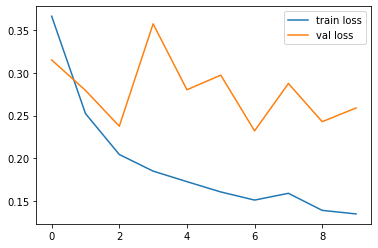

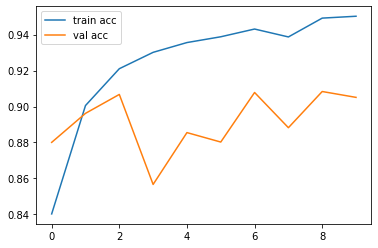

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:

model.save('model_malariadetection.h5')

In [ ]:
from google.colab import files
files.download('model_malariadetection.h5')
#Downloads the file to downloads folder of local m/c

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

y_pred = model.predict(test_set)


173/173 [==============================] - 30s 173ms/step


In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [6]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [7]:
model=load_model('model_malariadetection.h5')

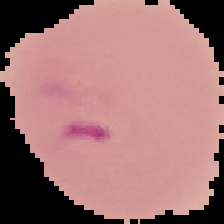

In [14]:
#img=image.load_img('uploads/C39P4thinF_original_IMG_20150622_105554_cell_18.png',target_size=(224,224))
#img=image.load_img('uploads/C3thin_original_IMG_20150608_162922_cell_191.png',target_size=(224,224))
#img=image.load_img('/content/cell_images/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144348_cell_125.png',target_size=(224,224))
img=image.load_img('/content/cell_images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144348_cell_140.png',target_size=(224,224))
img

In [ ]:
!pip install opencv-python

Loaded Image Shape: (160, 124, 3)


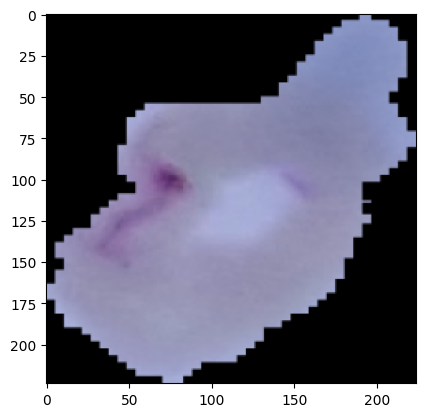

1/1 [==============================] - 0s 218ms/step
[[0.]]


In [ ]:
import cv2
img = cv2.imread('uploads/C39P4thinF_original_IMG_20150622_105554_cell_18.png'); 
#img = cv2.imread('uploads/C3thin_original_IMG_20150608_163002_cell_39.png'); 

# Setting the dimensions for the loaded image to be converted into and displaying the shape of the image 
print("Loaded Image Shape: {}".format(img.shape)); 

# Resizing the image 
img = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA); 
plt.grid(False) 
plt.imshow(img) 
plt.show() 

# Expanding the image dimensions 
image = np.expand_dims(img, axis = 0); 

# Making Final Predictions 
result = model.predict(image)
print(result)
# # Creating a loop to get the actual predicted class 
# for key, value in (training_set.class_indices.items()): 
#     if value == result: 
#         print("The Predicted Class is: {}".format(key))

In [15]:
# import tensorflow as tf
# tf.image.resize(img, (224, 224))
x=image.img_to_array(img)

In [16]:
x.shape

(224, 224, 3)

In [17]:
#x=x/255
x=np.expand_dims(x,axis=0)
#img_data=preprocess_input(x)
x.shape

(1, 224, 224, 3)

In [18]:
pred=model.predict(x)
pred

1/1 [==============================] - 0s 28ms/step


array([[0.]], dtype=float32)

In [ ]:
#a=np.argmax(model.predict(img_data), axis=1)

In [19]:
if(pred==1):
    print("Uninfected")
else:
    print("Infected")

Infected
